###### What to do?
- make categorical variables from interactions and kind of event
- make python data format and divide it into months, days, (hours)
- count frequencies

---

##### As usual install some packages

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import array, newaxis

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

###### Unload some data about communication

In [3]:
com_train = pd.read_csv('C://Users//Julia//Desktop//WorldClass//December//Communications.csv',encoding = 'cp1251')
com_test = pd.read_csv('C://Users//Julia//Desktop//WorldClass//March//Communications.csv',encoding = 'cp1251')

In [4]:
com_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480102 entries, 0 to 480101
Data columns (total 4 columns):
КодКлиента                 480086 non-null float64
ДатаВзаимодействия         480102 non-null object
ВидСобытия                 479811 non-null object
СостояниеВзаимодействия    480102 non-null object
dtypes: float64(1), object(3)
memory usage: 18.3+ MB


In [5]:
com_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030639 entries, 0 to 1030638
Data columns (total 4 columns):
КодКлиента                 1030620 non-null float64
ДатаВзаимодействия         1030639 non-null object
ВидСобытия                 1028303 non-null object
СостояниеВзаимодействия    1030638 non-null object
dtypes: float64(1), object(3)
memory usage: 39.3+ MB


In [6]:
com_train['Test'] = False
com_test['Test'] = True

In [7]:
com_data = pd.concat([com_test, com_train], ignore_index = True)

In [8]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510741 entries, 0 to 1510740
Data columns (total 5 columns):
КодКлиента                 1510706 non-null float64
ДатаВзаимодействия         1510741 non-null object
ВидСобытия                 1508114 non-null object
СостояниеВзаимодействия    1510740 non-null object
Test                       1510741 non-null bool
dtypes: bool(1), float64(1), object(3)
memory usage: 59.1+ MB


###### Observing variabls

In [9]:
com_data.СостояниеВзаимодействия.value_counts()

Состоялось       946972
Запланировано    384737
Отменено         179031
Name: СостояниеВзаимодействия, dtype: int64

In [10]:
com_data.ВидСобытия.value_counts()

Телефонный звонок исходящий     1044536
Встреча                          250562
Телефонный звонок входящий       178277
Смс                               21300
Электронное письмо исходящее       6588
Встреча на оплату                  3562
Продажа                            2730
Обратная связь                      530
Визит                                29
Name: ВидСобытия, dtype: int64

##### NaN

In [11]:
com_data.isnull().sum()

КодКлиента                   35
ДатаВзаимодействия            0
ВидСобытия                 2627
СостояниеВзаимодействия       1
Test                          0
dtype: int64

In [12]:
com_data.index[com_data.СостояниеВзаимодействия.isnull()]

Int64Index([774947], dtype='int64')

In [13]:
com_data.loc[774947]

КодКлиента                                      751716
ДатаВзаимодействия                  25.02.2016 0:00:00
ВидСобытия                 Телефонный звонок исходящий
СостояниеВзаимодействия                            NaN
Test                                              True
Name: 774947, dtype: object

In [14]:
com_data[com_data['КодКлиента'] == 751716]

,КодКлиента,ДатаВзаимодействия,ВидСобытия,СостояниеВзаимодействия,Test
774947,751716,25.02.2016 0:00:00,Телефонный звонок исходящий,NaN,True
774948,751716,13.11.2015 17:36:23,Телефонный звонок исходящий,Отменено,True
774949,751716,10.11.2015 19:19:34,Телефонный звонок исходящий,Отменено,True
774950,751716,12.02.2016 17:19:21,Телефонный звонок исходящий,Отменено,True
774951,751716,25.02.2016 13:47:50,Телефонный звонок исходящий,Состоялось,True
1496641,751716,13.11.2015 17:36:23,Телефонный звонок исходящий,Отменено,False
1496642,751716,10.11.2015 19:19:34,Телефонный звонок исходящий,Отменено,False


##### The same procedure but using function

In [15]:
def mask(df, key, value):
    return df[df[key] == value]

In [16]:
client = mask(com_data, 'КодКлиента', 751716)

In [17]:
com_data.loc[774947]

КодКлиента                                      751716
ДатаВзаимодействия                  25.02.2016 0:00:00
ВидСобытия                 Телефонный звонок исходящий
СостояниеВзаимодействия                            NaN
Test                                              True
Name: 774947, dtype: object

In [18]:
client.СостояниеВзаимодействия

774947            NaN
774948       Отменено
774949       Отменено
774950       Отменено
774951     Состоялось
1496641      Отменено
1496642      Отменено
Name: СостояниеВзаимодействия, dtype: object

In [19]:
client.СостояниеВзаимодействия.isnull() 

774947      True
774948     False
774949     False
774950     False
774951     False
1496641    False
1496642    False
Name: СостояниеВзаимодействия, dtype: bool

##### Drop the row in which time was 0:00:00

In [20]:
code774947 = com_data.loc[774947]
com_data.drop([774947], axis = 0, inplace = True)

In [21]:
com_data[com_data['КодКлиента'] == 751716]

,КодКлиента,ДатаВзаимодействия,ВидСобытия,СостояниеВзаимодействия,Test
774948,751716,13.11.2015 17:36:23,Телефонный звонок исходящий,Отменено,True
774949,751716,10.11.2015 19:19:34,Телефонный звонок исходящий,Отменено,True
774950,751716,12.02.2016 17:19:21,Телефонный звонок исходящий,Отменено,True
774951,751716,25.02.2016 13:47:50,Телефонный звонок исходящий,Состоялось,True
1496641,751716,13.11.2015 17:36:23,Телефонный звонок исходящий,Отменено,False
1496642,751716,10.11.2015 19:19:34,Телефонный звонок исходящий,Отменено,False


In [22]:
com_data.isnull().sum()

КодКлиента                   35
ДатаВзаимодействия            0
ВидСобытия                 2627
СостояниеВзаимодействия       0
Test                          0
dtype: int64

Now we have nan in ВидСобытия and КодКлиента, however our dataset is quate large(more then 1bl), so we just remove empty spaces

In [23]:
com_data = com_data.dropna()

In [24]:
com_data.isnull().sum()

КодКлиента                 0
ДатаВзаимодействия         0
ВидСобытия                 0
СостояниеВзаимодействия    0
Test                       0
dtype: int64

Spliting ДатаВзаимодействия

In [25]:
days_of_interaction = pd.DataFrame(com_data.ДатаВзаимодействия.str.split().str[0])

In [26]:
days_of_interaction.head()

,0
0,24.02.2016
1,10.12.2015
2,10.12.2015
3,15.01.2016
4,18.01.2016


In [27]:
com_data["days_of_interaction"] = days_of_interaction

In [28]:
com_data.head()

,КодКлиента,ДатаВзаимодействия,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction
0,1272,24.02.2016 11:05:07,Электронное письмо исходящее,Состоялось,True,24.02.2016
1,1280,10.12.2015 15:00:00,Встреча,Запланировано,True,10.12.2015
2,1280,10.12.2015 15:50:00,Встреча,Запланировано,True,10.12.2015
3,1280,15.01.2016 21:20:32,Телефонный звонок входящий,Состоялось,True,15.01.2016
4,1280,18.01.2016 11:56:15,Телефонный звонок исходящий,Отменено,True,18.01.2016


# com_data.ВидСобытия.value_counts()

In [29]:
com_data_nodubl = com_data.drop_duplicates()

In [30]:
com_data_nodubl.head()

,КодКлиента,ДатаВзаимодействия,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction
0,1272,24.02.2016 11:05:07,Электронное письмо исходящее,Состоялось,True,24.02.2016
1,1280,10.12.2015 15:00:00,Встреча,Запланировано,True,10.12.2015
2,1280,10.12.2015 15:50:00,Встреча,Запланировано,True,10.12.2015
3,1280,15.01.2016 21:20:32,Телефонный звонок входящий,Состоялось,True,15.01.2016
4,1280,18.01.2016 11:56:15,Телефонный звонок исходящий,Отменено,True,18.01.2016


In [31]:
com_data_nodubl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501138 entries, 0 to 1510740
Data columns (total 6 columns):
КодКлиента                 1501138 non-null float64
ДатаВзаимодействия         1501138 non-null object
ВидСобытия                 1501138 non-null object
СостояниеВзаимодействия    1501138 non-null object
Test                       1501138 non-null bool
days_of_interaction        1501138 non-null object
dtypes: bool(1), float64(1), object(4)
memory usage: 70.1+ MB


In [32]:
com_data_nodubl.shape

(1501138, 6)

In [33]:
com_data.shape

(1508078, 6)

#### What have we now??

- we eliminate all dublicates
- we delete all nuns
- take from data/time collumn only data

###### What shoul we do next?

- make categorical variables from ВидСобытия&СостояниеВзаимодействия
- group client's code and calculate frequency of interaction, 

In [34]:
com_data[com_data['КодКлиента'] == 3120]

,КодКлиента,ДатаВзаимодействия,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction
2216,3120,07.10.2015 9:00:00,Встреча,Запланировано,True,07.10.2015
2217,3120,28.09.2015 19:00:00,Телефонный звонок исходящий,Запланировано,True,28.09.2015
2218,3120,06.10.2015 15:16:39,Встреча,Состоялось,True,06.10.2015
2219,3120,01.12.2015 0:00:00,Телефонный звонок исходящий,Состоялось,True,01.12.2015
2220,3120,08.12.2015 14:44:41,Телефонный звонок исходящий,Состоялось,True,08.12.2015
2221,3120,01.12.2015 12:00:00,Телефонный звонок исходящий,Запланировано,True,01.12.2015
2222,3120,23.12.2015 14:45:54,Встреча,Состоялось,True,23.12.2015
2223,3120,23.12.2015 11:11:11,Встреча,Запланировано,True,23.12.2015
2224,3120,29.09.2015 13:15:09,Телефонный звонок исходящий,Состоялось,True,29.09.2015
1032277,3120,07.10.2015 9:00:00,Встреча,Запланировано,False,07.10.2015


In [35]:
import os
os.getcwd()

'C:\\Users\\Julia'

- Deleting dublicates in testing set but leave them in training one

In [36]:
no_test_col = com_data_nodubl[['КодКлиента', 'ДатаВзаимодействия','ВидСобытия','СостояниеВзаимодействия','days_of_interaction']]

In [37]:
clear_set = com_data_nodubl.drop_duplicates(no_test_col,"last")

In [38]:
clear_set[clear_set['КодКлиента'] == 751716]

,КодКлиента,ДатаВзаимодействия,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction
774950,751716,12.02.2016 17:19:21,Телефонный звонок исходящий,Отменено,True,12.02.2016
774951,751716,25.02.2016 13:47:50,Телефонный звонок исходящий,Состоялось,True,25.02.2016
1496641,751716,13.11.2015 17:36:23,Телефонный звонок исходящий,Отменено,False,13.11.2015
1496642,751716,10.11.2015 19:19:34,Телефонный звонок исходящий,Отменено,False,10.11.2015


## Now our df calls clear_set

- change format in col 'days_of_interaction'

In [39]:
import datetime
clear_set['days_of_interaction'] = pd.to_datetime(clear_set['days_of_interaction'], format='%d.%m.%Y')

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


- drop ДатаВзаимодействия

clear_set.drop(["ДатаВзаимодействия"], axis = 1, inplace = True)

In [45]:
clear_set.isnull().sum()

КодКлиента                 0
ВидСобытия                 0
СостояниеВзаимодействия    0
Test                       0
days_of_interaction        0
dtype: int64

In [46]:
clear_set.head()

,КодКлиента,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction
0,1272,Электронное письмо исходящее,Состоялось,True,2016-02-24
1,1280,Встреча,Запланировано,True,2015-12-10
2,1280,Встреча,Запланировано,True,2015-12-10
3,1280,Телефонный звонок входящий,Состоялось,True,2016-01-15
4,1280,Телефонный звонок исходящий,Отменено,True,2016-01-18


In [47]:
clear_set['days_of_interaction']

0         2016-02-24
1         2015-12-10
2         2015-12-10
3         2016-01-15
4         2016-01-18
5         2016-02-04
6         2016-02-04
7         2015-12-10
8         2016-01-15
9         2015-12-10
10        2015-12-10
14        2016-01-28
15        2015-12-12
16        2015-12-12
17        2015-12-18
18        2016-01-17
19        2016-02-10
20        2016-02-18
22        2016-01-29
23        2016-02-09
24        2016-01-29
25        2016-02-09
26        2015-12-29
27        2016-01-13
28        2016-01-21
29        2016-01-21
30        2016-01-22
31        2016-02-20
32        2016-02-05
33        2016-02-04
             ...    
1510711   2015-11-06
1510712   2015-10-09
1510713   2015-10-26
1510714   2015-11-20
1510715   2015-10-07
1510716   2015-10-23
1510717   2015-11-20
1510718   2015-11-23
1510719   2015-10-12
1510720   2015-10-07
1510721   2015-10-17
1510722   2015-10-07
1510723   2015-10-12
1510724   2015-10-23
1510725   2015-11-06
1510726   2015-10-12
1510727   201

In [48]:
clear_set.head()

,КодКлиента,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction
0,1272,Электронное письмо исходящее,Состоялось,True,2016-02-24
1,1280,Встреча,Запланировано,True,2015-12-10
2,1280,Встреча,Запланировано,True,2015-12-10
3,1280,Телефонный звонок входящий,Состоялось,True,2016-01-15
4,1280,Телефонный звонок исходящий,Отменено,True,2016-01-18


##### finally  making categorical variables

In [49]:
clear_set['Type_of_event'] = le.fit_transform(clear_set.ВидСобытия)

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
clear_set['Condition_of_commun'] = le.fit_transform(clear_set.СостояниеВзаимодействия)

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
clear_set.Type_of_event.value_counts()

7    696194
1    167077
6    128459
5     21280
8      5370
2      3545
4      1395
3       295
0        18
Name: Type_of_event, dtype: int64

In [52]:
clear_set.Condition_of_commun.value_counts()

2    640635
0    253811
1    129187
Name: Condition_of_commun, dtype: int64

In [53]:
clear_set.head()

,КодКлиента,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction,Type_of_event,Condition_of_commun
0,1272,Электронное письмо исходящее,Состоялось,True,2016-02-24,8,2
1,1280,Встреча,Запланировано,True,2015-12-10,1,0
2,1280,Встреча,Запланировано,True,2015-12-10,1,0
3,1280,Телефонный звонок входящий,Состоялось,True,2016-01-15,6,2
4,1280,Телефонный звонок исходящий,Отменено,True,2016-01-18,7,1


Надо вытащить месяц

In [54]:
clear_set['Month_of_int'] = clear_set.days_of_interaction.apply(lambda x: x.month)

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
clear_set.head()

,КодКлиента,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction,Type_of_event,Condition_of_commun,Month_of_int
0,1272,Электронное письмо исходящее,Состоялось,True,2016-02-24,8,2,2
1,1280,Встреча,Запланировано,True,2015-12-10,1,0,12
2,1280,Встреча,Запланировано,True,2015-12-10,1,0,12
3,1280,Телефонный звонок входящий,Состоялось,True,2016-01-15,6,2,1
4,1280,Телефонный звонок исходящий,Отменено,True,2016-01-18,7,1,1


In [56]:
clear_set["Встретился"] = clear_set.СостояниеВзаимодействия.apply(lambda x: int(x == "Состоялось"))

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
clear_set.head(10)

,КодКлиента,ВидСобытия,СостояниеВзаимодействия,Test,days_of_interaction,Type_of_event,Condition_of_commun,Month_of_int,Встретился
0,1272,Электронное письмо исходящее,Состоялось,True,2016-02-24,8,2,2,1
1,1280,Встреча,Запланировано,True,2015-12-10,1,0,12,0
2,1280,Встреча,Запланировано,True,2015-12-10,1,0,12,0
3,1280,Телефонный звонок входящий,Состоялось,True,2016-01-15,6,2,1,1
4,1280,Телефонный звонок исходящий,Отменено,True,2016-01-18,7,1,1,0
5,1280,Телефонный звонок входящий,Состоялось,True,2016-02-04,6,2,2,1
6,1280,Телефонный звонок исходящий,Состоялось,True,2016-02-04,7,2,2,1
7,1280,Встреча,Состоялось,True,2015-12-10,1,2,12,1
8,1280,Телефонный звонок исходящий,Состоялось,True,2016-01-15,7,2,1,1
9,1280,Встреча,Состоялось,True,2015-12-10,1,2,12,1


In [58]:
clear_set['Sum'] = [1]*len(clear_set)

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
clear_set.ВидСобытия.value_counts()

Телефонный звонок исходящий     696194
Встреча                         167077
Телефонный звонок входящий      128459
Смс                              21280
Электронное письмо исходящее      5370
Встреча на оплату                 3545
Продажа                           1395
Обратная связь                     295
Визит                               18
Name: ВидСобытия, dtype: int64

In [60]:
clear_set.Type_of_event.value_counts()

7    696194
1    167077
6    128459
5     21280
8      5370
2      3545
4      1395
3       295
0        18
Name: Type_of_event, dtype: int64

In [61]:
grouped = clear_set[['Встретился','Sum']].groupby([clear_set['КодКлиента'],clear_set['Test'],clear_set['Type_of_event'],
                                                        clear_set['Condition_of_commun'],clear_set['Month_of_int']]).sum()

In [62]:
grouped_commun = pd.DataFrame(grouped.reset_index())

In [63]:
grouped_commun.head(100)

,КодКлиента,Test,Type_of_event,Condition_of_commun,Month_of_int,Встретился,Sum
0,4,False,6,2,8,1,1
1,4,False,6,2,10,2,2
2,4,False,7,2,8,9,9
3,4,False,7,2,10,1,1
4,9,False,6,2,8,1,1
5,9,False,7,2,8,7,7
6,10,False,6,2,8,1,1
7,12,False,6,2,8,2,2
8,12,False,7,2,9,2,2
9,13,True,6,2,1,1,1


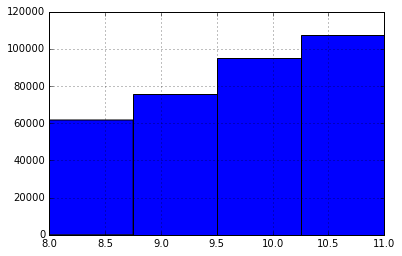

In [64]:
%matplotlib inline
grouped_commun[grouped_commun.Test == False].Month_of_int.hist(bins = 4)


In [65]:
contracts = pd.read_pickle('C://Users//Julia//Desktop//WorldClass//dima.pkl')

In [108]:
contracts.head(100)

,КодКлиента,КодКонтракта,КодНоменклатуры,ДатаНачалаСрокаДействия,ДатаОкончанияСрокаДействия,ВидСтажаНаНачалоМесяца,ВидСтажаВМоментПриобретения,ВидДоговора,БонусыОстаток,ДлительностьКонтракта,...,Cont_length,beg_month,beg_day,Season,age_group,club_segment,bought_freeze,bonus_left,contr_type,nom_lev
0,3101,29908,36109,21.11.2014,20.12.2015,Renew,Renew,other,390,365,...,394,11,21,3,2,1,0,390,0,5
1,3120,28457,99,26.06.2015,24.12.2015,Renew,Ex,other,645.14,182,...,181,6,26,2,2,1,0,645.14,0,1
2,3126,8230,99,29.10.2014,27.12.2015,Renew,Renew,other,6 275.96,395,...,424,10,29,3,2,3,0,6275.96,0,1
3,3153,8121,99,02.12.2014,15.12.2015,Renew,Renew,other,0.72,365,...,378,12,2,0,2,3,0,0.72,0,1
4,3156,29730,36109,16.11.2014,11.12.2015,Renew,Renew,other,520,365,...,390,11,16,3,2,1,0,520,0,5
5,3160,29754,99,15.11.2014,14.12.2015,Renew,Renew,other,3 812.43,365,...,394,11,15,3,2,1,0,3812.43,0,1
6,3171,36468,99,01.12.2014,07.12.2015,New,Renew,other,398.85,365,...,371,12,1,0,2,2,0,398.85,0,1
7,3202,29660,99,26.10.2014,24.12.2015,Renew,Renew,other,670,395,...,424,10,26,3,2,1,0,670,0,1
8,3213,29434,36109,04.10.2014,02.12.2015,Renew,Renew,other,20.74,395,...,424,10,4,3,2,1,0,20.74,0,5
9,3242,25440,99,29.10.2014,27.12.2015,Renew,Renew,other,3 125.05,395,...,424,10,29,3,2,1,0,3125.05,0,1


In [67]:
count = 0
client_good = []
from_contracts = contracts.КодКлиента.unique()
for client in grouped_commun.КодКлиента.unique():
    if client in from_contracts:
        count += 1
        client_good.append(client)
print(count)

15264


In [68]:
len(grouped_commun.КодКлиента.unique())

229263

In [69]:
boolean = grouped_commun.КодКлиента.apply(lambda x: x in client_good)

In [70]:
clear_grouped_com = grouped_commun[boolean]

In [72]:
clear_grouped_com.head(18)

,КодКлиента,Test,Type_of_event,Condition_of_commun,Month_of_int,Встретился,Sum
526,1948,True,6,2,12,1,1
737,2626,False,7,2,8,1,1
738,2626,False,7,2,10,1,1
739,2626,True,1,0,12,0,1
740,2626,True,1,2,12,1,1
741,2626,True,5,2,1,1,1
742,2626,True,6,2,1,2,2
743,2626,True,6,2,2,2,2
744,2626,True,7,0,2,0,1
745,2626,True,7,2,12,1,1


In [73]:
clear_grouped_com = pd.DataFrame(clear_grouped_com.reset_index())

In [75]:
for row in range(0,len(clear_grouped_com)):
    if clear_grouped_com.loc[row,"Month_of_int"] == 12:
        clear_grouped_com.loc[row,"Test"] = False

In [76]:
for row in range(0,len(clear_grouped_com)):
    if clear_grouped_com.loc[row,"Month_of_int"] == 10:
        clear_grouped_com.loc[row,"Test"] = False

In [77]:
clear_grouped_com.head(10)

,index,КодКлиента,Test,Type_of_event,Condition_of_commun,Month_of_int,Встретился,Sum
0,526,1948,False,6,2,12,1,1
1,737,2626,False,7,2,8,1,1
2,738,2626,False,7,2,10,1,1
3,739,2626,False,1,0,12,0,1
4,740,2626,False,1,2,12,1,1
5,741,2626,True,5,2,1,1,1
6,742,2626,True,6,2,1,2,2
7,743,2626,True,6,2,2,2,2
8,744,2626,True,7,0,2,0,1
9,745,2626,False,7,2,12,1,1


In [79]:
clear_grouped_com.Test.value_counts()

False    38653
True     21554
Name: Test, dtype: int64

In [80]:
clear_grouped_com[clear_grouped_com.Test == True].Month_of_int.value_counts()

2    13655
1     7899
Name: Month_of_int, dtype: int64

In [81]:
clear_grouped_com[clear_grouped_com.Test == False].Month_of_int.value_counts()

12    19063
11     7649
10     5833
9      3482
8      2626
Name: Month_of_int, dtype: int64

In [82]:
data_calls = pd.DataFrame()

In [83]:
for row in range(0,len(clear_grouped_com)):
    if clear_grouped_com.loc[row,"Month_of_int"]== 11 or clear_grouped_com.loc[row,"Month_of_int"] == 12:
        data_calls.loc[row, "Com_last_month"] = 1
    else:
        data_calls.loc[row, "Com_last_month"] = 0

In [84]:
data_calls.head()

,Com_last_month
0,1
1,0
2,0
3,1
4,1


In [85]:
data_calls["КодКлиента"] = clear_grouped_com['КодКлиента']

In [86]:
data_calls["successful_commun"] = clear_grouped_com['Встретился']

In [87]:
data_calls["sum_commun"] = clear_grouped_com['Sum']

In [89]:
data_calls.head(16)

,Com_last_month,КодКлиента,successful_commun,sum_commun
0,1,1948,1,1
1,0,2626,1,1
2,0,2626,1,1
3,1,2626,0,1
4,1,2626,1,1
5,0,2626,1,1
6,0,2626,2,2
7,0,2626,2,2
8,0,2626,0,1
9,1,2626,1,1


In [90]:
len(clear_grouped_com)

60207

In [91]:
len(data_calls)

60207

In [92]:
for row in range(0,len(clear_grouped_com)):
    if clear_grouped_com.loc[row,"Type_of_event"]== 1 or clear_grouped_com.loc[row,"Type_of_event"]== 2 or clear_grouped_com.loc[row,"Type_of_event"]== 4 or clear_grouped_com.loc[row,"Type_of_event"]== 0:
        data_calls.loc[row, "meeting"] = 1
        data_calls.loc[row, "telephone_commun"] = 0
        data_calls.loc[row, "other_commun"] = 0
    elif clear_grouped_com.loc[row,"Type_of_event"]== 7 or clear_grouped_com.loc[row,"Type_of_event"]== 6 or clear_grouped_com.loc[row,"Type_of_event"]== 5:
        data_calls.loc[row, "meeting"] = 0
        data_calls.loc[row, "telephone_commun"] = 1
        data_calls.loc[row, "other_commun"] = 0
    else:
        data_calls.loc[row, "meeting"] = 0
        data_calls.loc[row, "telephone_commun"] = 0
        data_calls.loc[row, "other_commun"] = 1
        

In [93]:
len(data_calls)

60207

In [94]:
data_calls.head(10)

,Com_last_month,КодКлиента,successful_commun,sum_commun,meeting,telephone_commun,other_commun
0,1,1948,1,1,0,1,0
1,0,2626,1,1,0,1,0
2,0,2626,1,1,0,1,0
3,1,2626,0,1,1,0,0
4,1,2626,1,1,1,0,0
5,0,2626,1,1,0,1,0
6,0,2626,2,2,0,1,0
7,0,2626,2,2,0,1,0
8,0,2626,0,1,0,1,0
9,1,2626,1,1,0,1,0


In [95]:
grouped = data_calls[['Com_last_month',"sum_commun", "successful_commun","meeting","telephone_commun","other_commun"]].groupby([data_calls['КодКлиента']]).sum()

In [96]:
final_data_calls = pd.DataFrame(grouped.reset_index())

In [97]:
final_data_calls.head()

,КодКлиента,Com_last_month,sum_commun,successful_commun,meeting,telephone_commun,other_commun
0,1948,1,1,1,0,1,0
1,2626,3,11,9,2,7,0
2,2634,0,4,4,0,2,0
3,2637,7,39,25,8,14,1
4,2666,2,3,3,0,3,0


In [98]:
final_data_calls.Com_last_month = final_data_calls.Com_last_month.apply(lambda x: int(x>0))

In [99]:
final_data_calls.meeting = final_data_calls.meeting.apply(lambda x: int(x>0))

In [100]:
final_data_calls.telephone_commun = final_data_calls.telephone_commun.apply(lambda x: int(x>0))

In [101]:
final_data_calls.other_commun = final_data_calls.other_commun.apply(lambda x: int(x>0))

In [102]:
final_data_calls.head()

,КодКлиента,Com_last_month,sum_commun,successful_commun,meeting,telephone_commun,other_commun
0,1948,1,1,1,0,1,0
1,2626,1,11,9,1,1,0
2,2634,0,4,4,0,1,0
3,2637,1,39,25,1,1,1
4,2666,1,3,3,0,1,0


In [103]:
len(final_data_calls)

15264

In [104]:
for row in range(0,len(final_data_calls)):
    final_data_calls.loc[row, "friquency_os_success_commun"] = float(final_data_calls.loc[row, "successful_commun"])/float(final_data_calls.loc[row, "sum_commun"])

In [107]:
final_data_calls.head(100)

,КодКлиента,Com_last_month,sum_commun,successful_commun,meeting,telephone_commun,other_commun,friquency_os_success_commun
0,1948,1,1,1,0,1,0,1.000000
1,2626,1,11,9,1,1,0,0.818182
2,2634,0,4,4,0,1,0,1.000000
3,2637,1,39,25,1,1,1,0.641026
4,2666,1,3,3,0,1,0,1.000000
5,2686,1,6,3,0,1,0,0.500000
6,2687,1,11,7,1,1,0,0.636364
7,2711,0,1,0,0,1,0,0.000000
8,2732,1,3,1,1,1,0,0.333333
9,2739,1,4,3,0,1,1,0.750000


In [106]:
final_data_calls.to_pickle('C://Users//Julia//Desktop//WorldClass//final_calls.pkl')